## Where Do People Drink The Most Beer, Wine And Spirits?

<img src="https://s1.qwant.com/thumbr/0x0/3/f/a2d61eb9aa851a55e62456389bde7986e358da62a08b5c5ac98aaa851447dc/alcoholconsumption.gif?u=http%3A%2F%2F4.bp.blogspot.com%2F-0u5Sk_omAEE%2FTV3XZtyPQ1I%2FAAAAAAAAArc%2FyVlSiUp6aTU%2Fs1600%2Falcoholconsumption.gif&q=0&b=1&p=0&a=1">

The dataset for this analysis is from this post in [FiveThirtyEight](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)

Data: https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

In [ ]:
import pandas as pd
import seaborn as sns
alcohol = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
alcohol

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


## Problem 1
Convert the following data into tidy format with the headers `country`, `drink` and `servings`. Drop the column `total_litres_of_pure_alcohol`

In [ ]:
#alcohol.drop(columns='total_litres_of_pure_alcohol')
tidy_alcohol = alcohol.drop(columns='total_litres_of_pure_alcohol')
tidy_alcohol = tidy_alcohol.melt(id_vars=["country"], var_name="drink", value_name="servings")
tidy_alcohol

,country,drink,servings
0,Afghanistan,beer_servings,0
1,Albania,beer_servings,89
2,Algeria,beer_servings,25
3,Andorra,beer_servings,245
4,Angola,beer_servings,217
...,...,...,...
574,Venezuela,wine_servings,3
575,Vietnam,wine_servings,1
576,Yemen,wine_servings,0
577,Zambia,wine_servings,4


## Problem 2
Remove `"_servings"` from the data in the tidy dataframe in Problem 1. Who drinks the most beer, wine and spirits? Create a categorical plot of your choice to illustrate the top 10 countries that drink the most beer, wine, or spirits

Text(0.5, 1, 'Top 10 countries in consuming alcohol')

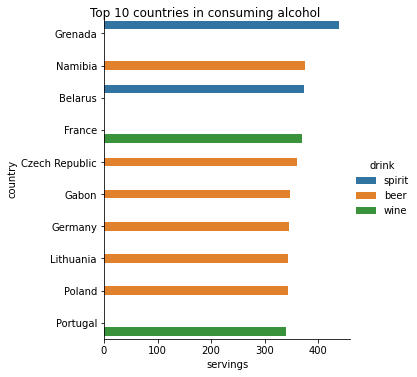

In [ ]:
tidy_alcohol['drink'] = tidy_alcohol['drink'].str.replace('_servings','')
top_10 = tidy_alcohol.sort_values('servings',ascending= False).head(10)
top_10_catplot= sns.catplot(data = top_10, x = "servings", y ="country", kind = "bar", hue= "drink")
top_10_catplot.fig.suptitle("Top 10 countries in consuming alcohol", y = 1)

## Problem 3
Create a wide dataframe using `pivot_table` with the tidy dataframe from Problem 2

In [ ]:
pd.pivot_table(tidy_alcohol, index='country', values='servings', columns= 'drink')

drink,beer,spirit,wine
country,,,
Afghanistan,0,0,0
Albania,89,132,54
Algeria,25,0,14
Andorra,245,138,312
Angola,217,57,45
...,...,...,...
Venezuela,333,100,3
Vietnam,111,2,1
Yemen,6,0,0
